# Linear Regression for Stock Price Prediction (5 year Dataset)

### Importing the required libraries

Below are the libraries that are used in order to perform the linear regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

import sklearn.metrics as sklm
#import seaborn as sns
%matplotlib inline 

### Load the financial history price of APPL using Pandas Library

Loading the data into pandas data frame is certainly one of the most important steps as we can view the data value from the excel data set. We need to read the excel file into a dataframe and the job will done by pandas data frame

In [2]:
dataframe = pd.read_csv("AAPL_5Y.csv",parse_dates = ['Date'],index_col = 'Date')

print("size: ",dataframe.shape)

# To display the top 10 rows
dataframe.head(10)

size:  (1136, 6)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-05-15,39.002499,39.162498,38.762501,38.924999,36.848984,104038800
2017-05-16,38.985001,39.014999,38.680000,38.867500,36.794552,80194000
2017-05-17,38.400002,38.642502,37.427502,37.562500,35.559155,203070800
2017-05-18,37.817501,38.334999,37.782501,38.134998,36.101105,134272800
2017-05-19,38.345001,38.494999,38.157501,38.264999,36.224186,107843200
2017-05-22,38.500000,38.645000,38.227501,38.497501,36.444283,91865600
2017-05-23,38.724998,38.724998,38.327499,38.450001,36.399315,79675600
2017-05-24,38.459999,38.542500,38.167500,38.334999,36.290440,76712000
2017-05-25,38.432499,38.587502,38.257500,38.467499,36.415874,76942400


### Display the historical prices of APPL stock in graph

Use the plot with figsize to set the size of the figure to a certain size. The y-axis of the graph is set to Close_Prices to show the closing prices of the stock

<function matplotlib.pyplot.show(close=None, block=None)>

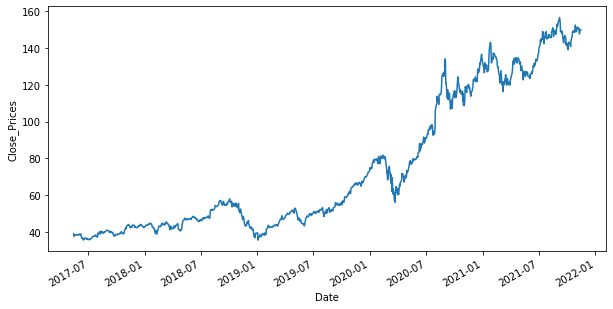

In [3]:
dataframe.Close.plot(figsize=(10,5))
plt.ylabel("Close_Prices")
plt.show

In [4]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1136 entries, 2017-05-15 to 2021-11-15
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1136 non-null   float64
 1   High       1136 non-null   float64
 2   Low        1136 non-null   float64
 3   Close      1136 non-null   float64
 4   Adj Close  1136 non-null   float64
 5   Volume     1136 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 62.1 KB


In [5]:
dataframe.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1136.000000,1136.000000,1136.000000,1136.000000,1136.000000,1.136000e+03
mean,75.290509,76.106133,74.489047,75.332441,73.972820,1.225107e+08
std,38.045101,38.459704,37.582703,38.037899,38.370790,5.708844e+07
min,35.724998,35.875000,35.500000,35.547501,33.670547,4.100000e+07
25%,43.809376,44.294999,43.619376,43.936876,42.271912,8.409360e+07
50%,55.164999,55.716251,54.401249,55.201250,53.584828,1.075506e+08
75%,115.808125,117.265001,114.129997,115.718123,114.496729,1.434609e+08
max,156.979996,157.259995,154.389999,156.690002,156.033325,4.265100e+08


### Set the split boundary to split the dataset

The code in the cell below set the training_size into 70% of total length of dataset. Then, dataset is split into 70% of training data and 30% testing data

Dimension of train data:  (795, 6)
Dimension of test data:  (341, 6)


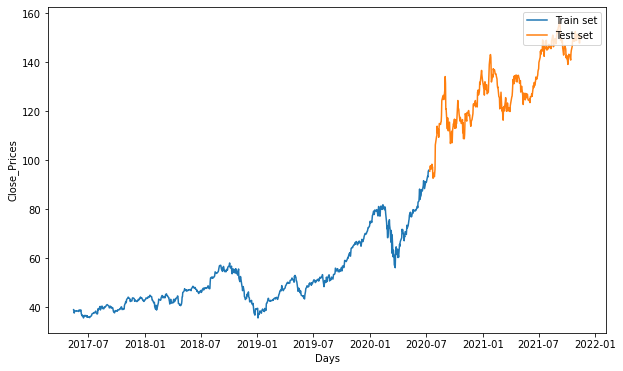

In [6]:
# Split train data and test data
training_size = int(len(dataframe)*0.7)
train_dataset, test_dataset = dataframe.iloc[:training_size], dataframe.iloc[training_size:]

# Plot train and test data
plt.figure(figsize = (10,6))
plt.plot(train_dataset.Close)
plt.plot(test_dataset.Close)
plt.xlabel('Days')
plt.ylabel('Close_Prices')
plt.legend(['Train set','Test set'], loc='upper right')

print('Dimension of train data: ', train_dataset.shape)
print('Dimension of test data: ', test_dataset.shape)

## The data are available in a pre-processed form. The preprocessing includes the following:
1. Noise Removal.
2. Data Normalization. 


### Noise Removal

The "close price" and "adjusted closing prices" will be drop from the dataset to form the features training set. <br>
Only the "close price" will be selected to form the label training set

In [7]:
#Split train data for X and Y
train_dataset = train_dataset.reset_index().drop('Date',axis = 1)

X_train = train_dataset.drop(['Close','Adj Close'], axis = 1)
Y_train = train_dataset[['Close']]

#Split test data for X and Y
test_dataset = test_dataset.reset_index().drop('Date',axis = 1)

X_test = test_dataset.drop(['Close','Adj Close'], axis = 1)
Y_test = test_dataset[['Close']]

print(X_train)
print(Y_test)

          Open       High        Low     Volume
0    39.002499  39.162498  38.762501  104038800
1    38.985001  39.014999  38.680000   80194000
2    38.400002  38.642502  37.427502  203070800
3    37.817501  38.334999  37.782501  134272800
4    38.345001  38.494999  38.157501  107843200
..         ...        ...        ...        ...
790  92.500000  93.945000  92.467499  118655600
791  93.852501  94.654999  93.057503  112424400
792  94.180000  95.375000  94.089996  117092000
793  96.262497  96.317497  94.672501  125642800
794  95.334999  95.980003  94.705002   90257200

[795 rows x 4 columns]
          Close
0     95.477501
1     97.057503
2     97.724998
3     96.522499
4     96.327499
..          ...
336  150.809998
337  147.919998
338  147.869995
339  149.990005
340  150.000000

[341 rows x 1 columns]


### Data Normalization

Import the MinMaxScaler library from scikit-learn to perform the data normalization process. The value in each column will be translated into the range 0 and 1

In [8]:
#for normalization data
from sklearn.preprocessing import MinMaxScaler
scaler_x = MinMaxScaler(feature_range=(0,1))
scaler_y = MinMaxScaler(feature_range = (0,1))

#FIt the scaler using available training data
input_scaler = scaler_x.fit(X_train)
output_scaler = scaler_y.fit(Y_train)

#Apply the scaler to training data
X_train_normalize = input_scaler.transform(X_train)
Y_train_normalize = output_scaler.transform(Y_train)



#Different scaler for input and output
scaler_x_test = MinMaxScaler(feature_range = (0,1))
scaler_y_test = MinMaxScaler(feature_range = (0,1))

#FIt the scaler using available training data
input_scaler_test = scaler_x_test.fit(X_test)
output_scaler_test = scaler_y_test.fit(Y_test)

X_test_normalize = input_scaler_test.transform(X_test)
Y_test_normalize = output_scaler_test.transform(Y_test)



print('X_train_normalize.shape:', X_train_normalize.shape)
print('Y_train_normalize.shape:', Y_train_normalize.shape)
print('X_test_normalize.shape:', X_test_normalize.shape)
print('Y_test_normalize.shape:', Y_test_normalize.shape)

X_train_normalize.shape: (795, 4)
Y_train_normalize.shape: (795, 1)
X_test_normalize.shape: (341, 4)
Y_test_normalize.shape: (341, 1)


In [9]:
print("X_train_normalize: \n\n", X_train_normalize)
print("Y_train_normalize: \n\n", Y_train_normalize)

print("X_test_normalize: \n\n", X_test_normalize)
print("Y_test_normalize: \n\n", Y_test_normalize)

X_train_normalize: 

 [[0.05414001 0.05439051 0.05510516 0.15375661]
 [0.05385097 0.05195019 0.05371168 0.09118201]
 [0.04418755 0.04578735 0.0325564  0.41364082]
 ...
 [0.96559988 0.98440672 0.98961226 0.1880114 ]
 [1.         1.         0.99945104 0.21045079]
 [0.98467895 0.99441628 1.         0.11759031]]
Y_train_normalize: 

 [[5.59443152e-02]
 [5.49919113e-02]
 [3.33761083e-02]
 [4.28588700e-02]
 [4.50121849e-02]
 [4.88633094e-02]
 [4.80765273e-02]
 [4.61716533e-02]
 [4.83663613e-02]
 [4.72897286e-02]
 [4.75381861e-02]
 [4.37698974e-02]
 [4.55090834e-02]
 [5.49090756e-02]
 [4.86148022e-02]
 [5.07681171e-02]
 [5.45777989e-02]
 [5.30042678e-02]
 [2.81170746e-02]
 [1.33752791e-02]
 [1.82201839e-02]
 [1.22986465e-02]
 [8.69596300e-03]
 [3.31276674e-04]
 [1.71849443e-02]
 [1.16774696e-02]
 [1.52386939e-02]
 [1.42448970e-02]
 [1.69365034e-02]
 [1.50316956e-02]
 [6.37704284e-03]
 [1.50730721e-02]
 [6.16997836e-03]
 [7.57795392e-03]
 [5.42463897e-03]
 [7.86778788e-03]
 [2.23608442e-03]
 [

### Import library required for linear regression

The class "sklearn.linear_model.LinearRegression(*, fit_intercept=True, normalize='deprecated', copy_X=True, n_jobs=None, positive=False)" is call to develop the linear regression model

In [10]:
from sklearn.linear_model import LinearRegression

Multivariable_LR = LinearRegression()
Multivariable_LR.fit(X_train_normalize,Y_train_normalize)
Multivariable_LR.get_params(deep=True)

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [11]:
print("Linear Score: ",Multivariable_LR.score(X_train_normalize,Y_train_normalize))

R2_score = Multivariable_LR.score(X_train_normalize,Y_train_normalize)*100
print("R2_score: ",'{:.2f}'.format(R2_score))

Linear Score:  0.9991596708827426
R2_score:  99.92


In [12]:
Multivariable_LR.coef_

array([[-0.55288372,  0.80484099,  0.73333675, -0.0057991 ]])

In [13]:
Multivariable_LR.intercept_

array([0.00305058])

In [14]:
prediction_of_LR = Multivariable_LR.predict(X_test_normalize)
prediction_of_LR_readable = scaler_y_test.inverse_transform(prediction_of_LR)
print(prediction_of_LR_readable)

[[ 99.27780889]
 [ 97.4429634 ]
 [ 98.71476309]
 [ 98.16613209]
 [ 97.70511523]
 [ 99.25833766]
 [ 98.85612132]
 [ 99.07995426]
 [ 94.76844775]
 [ 92.64945495]
 [ 95.93372961]
 [ 95.14816992]
 [ 96.37482864]
 [ 96.96029462]
 [105.24875879]
 [111.74848968]
 [111.07515046]
 [111.04925092]
 [114.28057354]
 [112.54727704]
 [112.72560705]
 [111.41156425]
 [113.71962562]
 [116.39322014]
 [114.75630756]
 [115.67907338]
 [116.57477648]
 [117.74187726]
 [118.96232256]
 [124.56855001]
 [126.01317359]
 [124.78119268]
 [126.9552671 ]
 [125.94173128]
 [126.21287801]
 [130.0092357 ]
 [133.62134644]
 [130.98338594]
 [124.63967648]
 [117.18386958]
 [118.09306932]
 [118.35527082]
 [115.78839515]
 [112.87036284]
 [115.41324598]
 [116.33531739]
 [114.63207898]
 [112.11755185]
 [108.6851775 ]
 [109.22597846]
 [111.37645428]
 [109.65866484]
 [110.33544612]
 [112.28481958]
 [114.75661204]
 [115.60715593]
 [117.56708615]
 [117.49053407]
 [115.52362982]
 [117.00355284]
 [114.6196745 ]
 [116.16822446]
 [116.32

In [15]:
Y_test_read = scaler_y_test.inverse_transform(Y_test_normalize)
Y_train_read = scaler_y.inverse_transform(Y_train_normalize)

print("Actual Value\n")
print(Y_test_read)
print("\nPrediction\n")
print(prediction_of_LR_readable)

Actual Value

[[ 95.477501]
 [ 97.057503]
 [ 97.724998]
 [ 96.522499]
 [ 96.327499]
 [ 98.357498]
 [ 97.      ]
 [ 97.272499]
 [ 92.845001]
 [ 92.614998]
 [ 94.809998]
 [ 93.252502]
 [ 95.040001]
 [ 96.190002]
 [106.260002]
 [108.9375  ]
 [109.665001]
 [110.0625  ]
 [113.902496]
 [111.112503]
 [112.727501]
 [109.375   ]
 [113.010002]
 [115.010002]
 [114.907501]
 [114.607498]
 [115.5625  ]
 [115.707497]
 [118.275002]
 [124.370003]
 [125.857498]
 [124.824997]
 [126.522499]
 [125.010002]
 [124.807503]
 [129.039993]
 [134.179993]
 [131.399994]
 [120.879997]
 [120.959999]
 [112.82    ]
 [117.32    ]
 [113.489998]
 [112.      ]
 [115.360001]
 [115.540001]
 [112.129997]
 [110.339996]
 [106.839996]
 [110.080002]
 [111.809998]
 [107.120003]
 [108.220001]
 [112.279999]
 [114.959999]
 [114.089996]
 [115.809998]
 [116.790001]
 [113.019997]
 [116.5     ]
 [113.160004]
 [115.080002]
 [114.970001]
 [116.970001]
 [124.400002]
 [121.099998]
 [121.190002]
 [120.709999]
 [119.019997]
 [115.980003]
 [117.

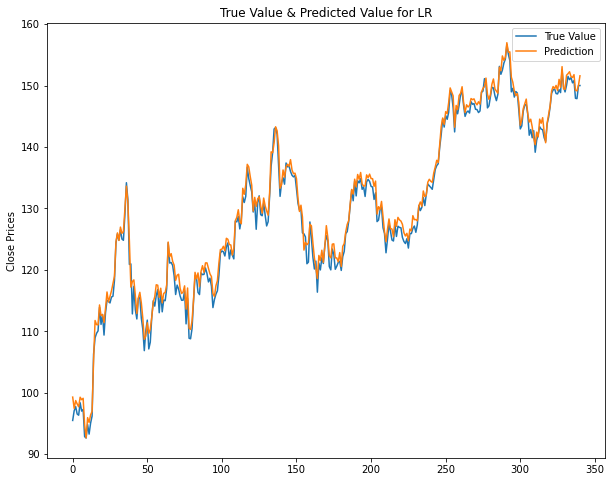

In [16]:
# Plot true future vs prediction
def plot_result(prediction, y_test, model_name):
    plt.figure(figsize = (10,8))
    range_future = len(prediction)
    plt.plot(np.arange(range_future), np.array(y_test), label='True Value')
    plt.plot(np.arange(range_future), np.array(prediction), label='Prediction')
    plt.legend(loc='upper right')
    plt.title('True Value & Predicted Value for '+ model_name)
    plt.ylabel('Close Prices')
    
plot_result(prediction_of_LR_readable, Y_test_read, 'LR')

In [17]:
print("Linear Score  : ", Multivariable_LR.score(X_test_normalize,Y_test_normalize))

R2_score = Multivariable_LR.score(X_test_normalize,Y_test_normalize)*100
print("R2_score (R^2): {:.2f}".format(R2_score))

Linear Score  :  0.9909388242197786
R2_score (R^2): 99.09


### Calculate the performance metrics

The Mean Square Error, Root Mean Square Error, Mean Absolute Error and R-square is calculated in this function

In [18]:
def print_metrics(y_true, y_predicted, year):
    print("The size of dataset is:", year)
    print('+-----------------------------+--------+')
    print('Mean Square Error (MSE)       = {:.4f}'.format(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error (RMSE) = {:.4f}'.format(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error (MAE)     = {:.4f}'.format(sklm.mean_absolute_error(y_true, y_predicted)))
    
    # R-squared evaluates the scatter of the data points around the fitted regression line. It is also called the coefficient of determination, or the coefficient of multiple determination for multiple regression. For the same data set, higher R-squared values represent smaller differences between the observed data and the fitted values.
    r2 = sklm.r2_score(y_true, y_predicted)
    print('R-square (R^2)                = {:.2f}'.format(r2*100))
    print('+-----------------------------+--------+')
    
print_metrics(Y_test_read, prediction_of_LR_readable, "5-year") 

The size of dataset is: 5-year
+-----------------------------+--------+
Mean Square Error (MSE)       = 1.8301
Root Mean Square Error (RMSE) = 1.3528
Mean Absolute Error (MAE)     = 1.1023
R-square (R^2)                = 99.09
+-----------------------------+--------+
